In [12]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
import seaborn as sns

In [3]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1009, 1011, 1013, 1043, 1045, 1047, 1049, 1051],21,11,2,3)

In [4]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [5]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.columns

MultiIndex([(1001,   'Raw_101'),
            (1001,    'Sg_101'),
            (1001, 'resid_101'),
            (1001,   'rms_101'),
            (1001,  'rmso_101'),
            (1001,   'Raw_102'),
            (1001,    'Sg_102'),
            (1001, 'resid_102'),
            (1001,   'rms_102'),
            (1001,  'rmso_102'),
            ...
            (1051,   'Raw_255'),
            (1051,    'Sg_255'),
            (1051, 'resid_255'),
            (1051,   'rms_255'),
            (1051,  'rmso_255'),
            (1051,   'Raw_256'),
            (1051,    'Sg_256'),
            (1051, 'resid_256'),
            (1051,   'rms_256'),
            (1051,  'rmso_256')],
           length=180)

In [7]:
cdf = df.corr()

In [8]:

def yield_rmso_crossgroup_corr(same_group=False, col_type="rmso_",yield_with_colnames = False):
    cols = [c for c in cdf.columns if c[1].startswith(col_type)]
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if (cols[i][0] == cols[j][0])==same_group: # different groups
                print(cols[i], cols[j])
                if yield_with_colnames:
                    yield ((cols[i], cols[j]), cdf.loc[cols[i],cols[j]])
                else:
                    yield cdf.loc[cols[i],cols[j]]

In [9]:
rm_cg = list(yield_rmso_crossgroup_corr())

(1001, 'rmso_101') (1004, 'rmso_110')
(1001, 'rmso_101') (1004, 'rmso_111')
(1001, 'rmso_101') (1004, 'rmso_112')
(1001, 'rmso_101') (1006, 'rmso_116')
(1001, 'rmso_101') (1006, 'rmso_117')
(1001, 'rmso_101') (1006, 'rmso_118')
(1001, 'rmso_101') (1007, 'rmso_119')
(1001, 'rmso_101') (1007, 'rmso_120')
(1001, 'rmso_101') (1007, 'rmso_121')
(1001, 'rmso_101') (1009, 'rmso_125')
(1001, 'rmso_101') (1009, 'rmso_126')
(1001, 'rmso_101') (1009, 'rmso_127')
(1001, 'rmso_101') (1011, 'rmso_131')
(1001, 'rmso_101') (1011, 'rmso_132')
(1001, 'rmso_101') (1011, 'rmso_133')
(1001, 'rmso_101') (1013, 'rmso_137')
(1001, 'rmso_101') (1013, 'rmso_138')
(1001, 'rmso_101') (1013, 'rmso_139')
(1001, 'rmso_101') (1043, 'rmso_230')
(1001, 'rmso_101') (1043, 'rmso_231')
(1001, 'rmso_101') (1043, 'rmso_232')
(1001, 'rmso_101') (1045, 'rmso_236')
(1001, 'rmso_101') (1045, 'rmso_237')
(1001, 'rmso_101') (1045, 'rmso_238')
(1001, 'rmso_101') (1047, 'rmso_242')
(1001, 'rmso_101') (1047, 'rmso_243')
(1001, 'rmso

(1045, 'rmso_238') (1051, 'rmso_255')
(1045, 'rmso_238') (1051, 'rmso_256')
(1047, 'rmso_242') (1049, 'rmso_248')
(1047, 'rmso_242') (1049, 'rmso_249')
(1047, 'rmso_242') (1049, 'rmso_250')
(1047, 'rmso_242') (1051, 'rmso_254')
(1047, 'rmso_242') (1051, 'rmso_255')
(1047, 'rmso_242') (1051, 'rmso_256')
(1047, 'rmso_243') (1049, 'rmso_248')
(1047, 'rmso_243') (1049, 'rmso_249')
(1047, 'rmso_243') (1049, 'rmso_250')
(1047, 'rmso_243') (1051, 'rmso_254')
(1047, 'rmso_243') (1051, 'rmso_255')
(1047, 'rmso_243') (1051, 'rmso_256')
(1047, 'rmso_244') (1049, 'rmso_248')
(1047, 'rmso_244') (1049, 'rmso_249')
(1047, 'rmso_244') (1049, 'rmso_250')
(1047, 'rmso_244') (1051, 'rmso_254')
(1047, 'rmso_244') (1051, 'rmso_255')
(1047, 'rmso_244') (1051, 'rmso_256')
(1049, 'rmso_248') (1051, 'rmso_254')
(1049, 'rmso_248') (1051, 'rmso_255')
(1049, 'rmso_248') (1051, 'rmso_256')
(1049, 'rmso_249') (1051, 'rmso_254')
(1049, 'rmso_249') (1051, 'rmso_255')
(1049, 'rmso_249') (1051, 'rmso_256')
(1049, 'rmso

In [10]:
rm_same = list(yield_rmso_crossgroup_corr(True))

(1001, 'rmso_101') (1001, 'rmso_102')
(1001, 'rmso_101') (1001, 'rmso_103')
(1001, 'rmso_102') (1001, 'rmso_103')
(1004, 'rmso_110') (1004, 'rmso_111')
(1004, 'rmso_110') (1004, 'rmso_112')
(1004, 'rmso_111') (1004, 'rmso_112')
(1006, 'rmso_116') (1006, 'rmso_117')
(1006, 'rmso_116') (1006, 'rmso_118')
(1006, 'rmso_117') (1006, 'rmso_118')
(1007, 'rmso_119') (1007, 'rmso_120')
(1007, 'rmso_119') (1007, 'rmso_121')
(1007, 'rmso_120') (1007, 'rmso_121')
(1009, 'rmso_125') (1009, 'rmso_126')
(1009, 'rmso_125') (1009, 'rmso_127')
(1009, 'rmso_126') (1009, 'rmso_127')
(1011, 'rmso_131') (1011, 'rmso_132')
(1011, 'rmso_131') (1011, 'rmso_133')
(1011, 'rmso_132') (1011, 'rmso_133')
(1013, 'rmso_137') (1013, 'rmso_138')
(1013, 'rmso_137') (1013, 'rmso_139')
(1013, 'rmso_138') (1013, 'rmso_139')
(1043, 'rmso_230') (1043, 'rmso_231')
(1043, 'rmso_230') (1043, 'rmso_232')
(1043, 'rmso_231') (1043, 'rmso_232')
(1045, 'rmso_236') (1045, 'rmso_237')
(1045, 'rmso_236') (1045, 'rmso_238')
(1045, 'rmso

RMS-O cross-group corr: 0.021 ± 0.17
RMS-O within-group corr:
      0.166 ± 0.20


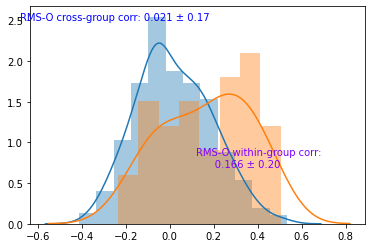

In [13]:
sns.distplot(rm_cg, bins=12)
sns.distplot(rm_same,bins=8)
stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "RMS-O cross-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(rm_cg)) 
str2 = "RMS-O within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(rm_same))
plt.text(-0.68,2.5, str1,color=(0,0,1))
plt.text(0.12,0.7, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [14]:
rm1_cg = list(yield_rmso_crossgroup_corr(False,"rms_"))
rm1_same = list(yield_rmso_crossgroup_corr(True,"rms_"))

(1001, 'rms_101') (1004, 'rms_110')
(1001, 'rms_101') (1004, 'rms_111')
(1001, 'rms_101') (1004, 'rms_112')
(1001, 'rms_101') (1006, 'rms_116')
(1001, 'rms_101') (1006, 'rms_117')
(1001, 'rms_101') (1006, 'rms_118')
(1001, 'rms_101') (1007, 'rms_119')
(1001, 'rms_101') (1007, 'rms_120')
(1001, 'rms_101') (1007, 'rms_121')
(1001, 'rms_101') (1009, 'rms_125')
(1001, 'rms_101') (1009, 'rms_126')
(1001, 'rms_101') (1009, 'rms_127')
(1001, 'rms_101') (1011, 'rms_131')
(1001, 'rms_101') (1011, 'rms_132')
(1001, 'rms_101') (1011, 'rms_133')
(1001, 'rms_101') (1013, 'rms_137')
(1001, 'rms_101') (1013, 'rms_138')
(1001, 'rms_101') (1013, 'rms_139')
(1001, 'rms_101') (1043, 'rms_230')
(1001, 'rms_101') (1043, 'rms_231')
(1001, 'rms_101') (1043, 'rms_232')
(1001, 'rms_101') (1045, 'rms_236')
(1001, 'rms_101') (1045, 'rms_237')
(1001, 'rms_101') (1045, 'rms_238')
(1001, 'rms_101') (1047, 'rms_242')
(1001, 'rms_101') (1047, 'rms_243')
(1001, 'rms_101') (1047, 'rms_244')
(1001, 'rms_101') (1049, 'rm

<AxesSubplot:>

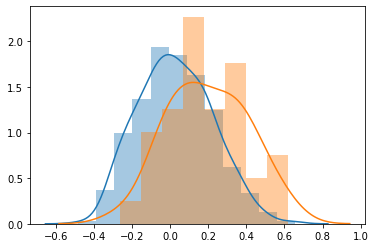

In [15]:
sns.distplot(rm1_cg, bins=12)
sns.distplot(rm1_same,bins=8)


In [16]:
raw_same = list(yield_rmso_crossgroup_corr(True,"Raw_"))
sg_same = list(yield_rmso_crossgroup_corr(True,"Sg_")) 


(1001, 'Raw_101') (1001, 'Raw_102')
(1001, 'Raw_101') (1001, 'Raw_103')
(1001, 'Raw_102') (1001, 'Raw_103')
(1004, 'Raw_110') (1004, 'Raw_111')
(1004, 'Raw_110') (1004, 'Raw_112')
(1004, 'Raw_111') (1004, 'Raw_112')
(1006, 'Raw_116') (1006, 'Raw_117')
(1006, 'Raw_116') (1006, 'Raw_118')
(1006, 'Raw_117') (1006, 'Raw_118')
(1007, 'Raw_119') (1007, 'Raw_120')
(1007, 'Raw_119') (1007, 'Raw_121')
(1007, 'Raw_120') (1007, 'Raw_121')
(1009, 'Raw_125') (1009, 'Raw_126')
(1009, 'Raw_125') (1009, 'Raw_127')
(1009, 'Raw_126') (1009, 'Raw_127')
(1011, 'Raw_131') (1011, 'Raw_132')
(1011, 'Raw_131') (1011, 'Raw_133')
(1011, 'Raw_132') (1011, 'Raw_133')
(1013, 'Raw_137') (1013, 'Raw_138')
(1013, 'Raw_137') (1013, 'Raw_139')
(1013, 'Raw_138') (1013, 'Raw_139')
(1043, 'Raw_230') (1043, 'Raw_231')
(1043, 'Raw_230') (1043, 'Raw_232')
(1043, 'Raw_231') (1043, 'Raw_232')
(1045, 'Raw_236') (1045, 'Raw_237')
(1045, 'Raw_236') (1045, 'Raw_238')
(1045, 'Raw_237') (1045, 'Raw_238')
(1047, 'Raw_242') (1047, 'Ra

Raw intra-group corr: 0.168 ± 0.17
sg intra-group corr: 0.225 ± 0.27


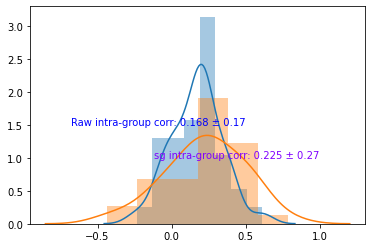

In [17]:
sns.distplot(raw_same)
sns.distplot(sg_same)

stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "Raw intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(raw_same)) 
str2 = "sg intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(sg_same))
plt.text(-0.68,1.5, str1,color=(0,0,1))
plt.text(-0.12,1., str2,color=(0.5,0,1))
print(str1)
print(str2)

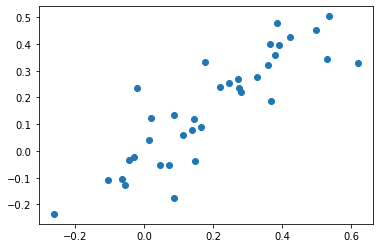

In [19]:
plt.scatter(rm1_same, rm_same)

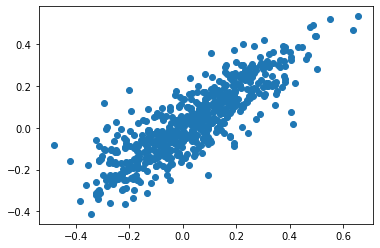

In [20]:
plt.scatter(rm1_cg, rm_cg)

In [ ]:
sum((x-y)**2 for x, y in zip(rm1_cg,rm_cg))

In [21]:
high_rmso = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True) if corr > 0.4]

(1001, 'rmso_101') (1001, 'rmso_102')
(1001, 'rmso_101') (1001, 'rmso_103')
(1001, 'rmso_102') (1001, 'rmso_103')
(1004, 'rmso_110') (1004, 'rmso_111')
(1004, 'rmso_110') (1004, 'rmso_112')
(1004, 'rmso_111') (1004, 'rmso_112')
(1006, 'rmso_116') (1006, 'rmso_117')
(1006, 'rmso_116') (1006, 'rmso_118')
(1006, 'rmso_117') (1006, 'rmso_118')
(1007, 'rmso_119') (1007, 'rmso_120')
(1007, 'rmso_119') (1007, 'rmso_121')
(1007, 'rmso_120') (1007, 'rmso_121')
(1009, 'rmso_125') (1009, 'rmso_126')
(1009, 'rmso_125') (1009, 'rmso_127')
(1009, 'rmso_126') (1009, 'rmso_127')
(1011, 'rmso_131') (1011, 'rmso_132')
(1011, 'rmso_131') (1011, 'rmso_133')
(1011, 'rmso_132') (1011, 'rmso_133')
(1013, 'rmso_137') (1013, 'rmso_138')
(1013, 'rmso_137') (1013, 'rmso_139')
(1013, 'rmso_138') (1013, 'rmso_139')
(1043, 'rmso_230') (1043, 'rmso_231')
(1043, 'rmso_230') (1043, 'rmso_232')
(1043, 'rmso_231') (1043, 'rmso_232')
(1045, 'rmso_236') (1045, 'rmso_237')
(1045, 'rmso_236') (1045, 'rmso_238')
(1045, 'rmso

In [22]:
high_rmso

[(((1006, 'rmso_117'), (1006, 'rmso_118')), 0.4532812482151282),
 (((1007, 'rmso_119'), (1007, 'rmso_120')), 0.479590996607964),
 (((1013, 'rmso_138'), (1013, 'rmso_139')), 0.4276577103107418),
 (((1051, 'rmso_254'), (1051, 'rmso_255')), 0.5037512812146371)]

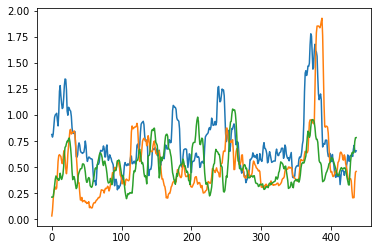

In [24]:
plt.plot(df[(1006, 'rmso_117')])
plt.plot(df[(1006, 'rmso_118')])
plt.plot(df[(1006, 'rmso_116')])


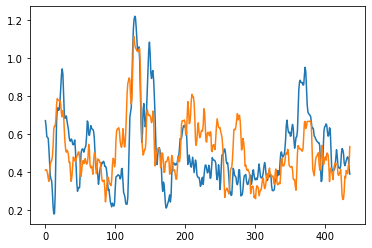

In [30]:
#plt.plot(df[(1051, 'rmso_256')])
plt.plot(df[(1051, 'rmso_254')])
plt.plot(df[(1051, 'rmso_255')])


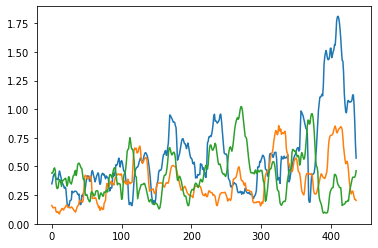

In [25]:
plt.plot(df[(1007, 'rmso_119')])
plt.plot(df[(1007, 'rmso_120')])
plt.plot(df[(1007, 'rmso_121')])

In [31]:
resid_sg = list(yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=False,col_type='resid_'))
resid_cg = list(yield_rmso_crossgroup_corr(same_group=False,yield_with_colnames=False,col_type='resid_'))

(1001, 'resid_101') (1001, 'resid_102')
(1001, 'resid_101') (1001, 'resid_103')
(1001, 'resid_102') (1001, 'resid_103')
(1004, 'resid_110') (1004, 'resid_111')
(1004, 'resid_110') (1004, 'resid_112')
(1004, 'resid_111') (1004, 'resid_112')
(1006, 'resid_116') (1006, 'resid_117')
(1006, 'resid_116') (1006, 'resid_118')
(1006, 'resid_117') (1006, 'resid_118')
(1007, 'resid_119') (1007, 'resid_120')
(1007, 'resid_119') (1007, 'resid_121')
(1007, 'resid_120') (1007, 'resid_121')
(1009, 'resid_125') (1009, 'resid_126')
(1009, 'resid_125') (1009, 'resid_127')
(1009, 'resid_126') (1009, 'resid_127')
(1011, 'resid_131') (1011, 'resid_132')
(1011, 'resid_131') (1011, 'resid_133')
(1011, 'resid_132') (1011, 'resid_133')
(1013, 'resid_137') (1013, 'resid_138')
(1013, 'resid_137') (1013, 'resid_139')
(1013, 'resid_138') (1013, 'resid_139')
(1043, 'resid_230') (1043, 'resid_231')
(1043, 'resid_230') (1043, 'resid_232')
(1043, 'resid_231') (1043, 'resid_232')
(1045, 'resid_236') (1045, 'resid_237')


In [32]:
resid_sg = np.array(resid_sg)
resid_cg = np.array(resid_cg)

Resid cross-group corr:
-0.004 ± 0.10
Resid within-group corr:
      0.083 ± 0.11


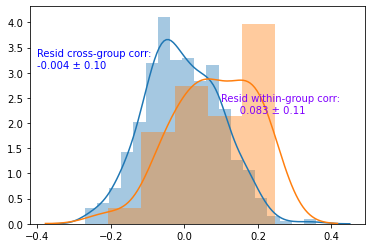

In [35]:
sns.distplot(resid_cg)

sns.distplot(resid_sg)

str1 = "Resid cross-group corr:\n{:.3f} \u00b1 {:.2f}".format(*stats(resid_cg)) 
str2 = "Resid within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(resid_sg))
plt.text(-0.4,3.1, str1,color=(0,0,1))
plt.text(0.1,2.2, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [36]:
from scipy.stats import ttest_ind

ttest_ind(resid_cg, resid_sg, equal_var=False)

Ttest_indResult(statistic=-4.669098335280993, pvalue=3.555144109975308e-05)

In [37]:
print("same group: {:.3f} \u00b1 {:.2f}".format(resid_sg.mean(), resid_sg.std()))
print("cross group: {:.3f} \u00b1 {:.2f}".format(resid_cg.mean(), resid_cg.std()))

same group: 0.083 ± 0.11
cross group: -0.004 ± 0.10


In [40]:
high_resid = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True,col_type='resid_') if corr > 0.2]

(1001, 'resid_101') (1001, 'resid_102')
(1001, 'resid_101') (1001, 'resid_103')
(1001, 'resid_102') (1001, 'resid_103')
(1004, 'resid_110') (1004, 'resid_111')
(1004, 'resid_110') (1004, 'resid_112')
(1004, 'resid_111') (1004, 'resid_112')
(1006, 'resid_116') (1006, 'resid_117')
(1006, 'resid_116') (1006, 'resid_118')
(1006, 'resid_117') (1006, 'resid_118')
(1007, 'resid_119') (1007, 'resid_120')
(1007, 'resid_119') (1007, 'resid_121')
(1007, 'resid_120') (1007, 'resid_121')
(1009, 'resid_125') (1009, 'resid_126')
(1009, 'resid_125') (1009, 'resid_127')
(1009, 'resid_126') (1009, 'resid_127')
(1011, 'resid_131') (1011, 'resid_132')
(1011, 'resid_131') (1011, 'resid_133')
(1011, 'resid_132') (1011, 'resid_133')
(1013, 'resid_137') (1013, 'resid_138')
(1013, 'resid_137') (1013, 'resid_139')
(1013, 'resid_138') (1013, 'resid_139')
(1043, 'resid_230') (1043, 'resid_231')
(1043, 'resid_230') (1043, 'resid_232')
(1043, 'resid_231') (1043, 'resid_232')
(1045, 'resid_236') (1045, 'resid_237')


In [41]:

high_resid

[(((1001, 'resid_101'), (1001, 'resid_103')), 0.2020641190839365),
 (((1001, 'resid_102'), (1001, 'resid_103')), 0.24731573416296673),
 (((1006, 'resid_116'), (1006, 'resid_117')), 0.236749293802371),
 (((1047, 'resid_242'), (1047, 'resid_243')), 0.23002578037872976),
 (((1047, 'resid_242'), (1047, 'resid_244')), 0.225770829240486)]

In [ ]:
print(dfc[(1008,'rmso_122')][(1008,'rmso_123')])
print(dfc[(1010,'rmso_128')][(1010,'rmso_130')])

In [ ]:
plt.plot(df[(1008, 'resid_122')])
plt.plot(df[(1008, 'resid_123')])

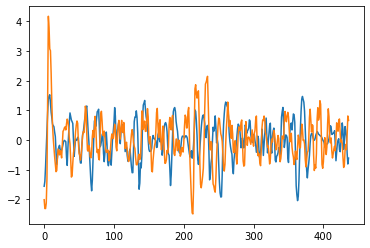

In [42]:
plt.plot(df[(1001, 'resid_101')])
plt.plot(df[(1001, 'resid_103')])

In [ ]:
plt.plot(df[(1010, 'rmso_128')])
plt.plot(df[(1010, 'rmso_130')])

In [ ]:
sns.set()

In [ ]:
sns.lineplot(np.arange(len(df)), df[(1007,'resid_120')])
sns.lineplot(np.arange(len(df)), df[(1007,'rms_120')])
plt.legend(['residual','rms'])

In [ ]:
data = gdd.get_db_data()
test_pars = list(data.get_signal_by_series_type_and_interp_type([112,117],2,3))
test_pars

In [ ]:
plt.plot(test_pars[0][1][:,1])
plt.plot(test_pars[1][1][:,1])

In [ ]:
group_compts1004 = sago.group_signal_components(1004)
group_compts1006 = sago.group_signal_components(1006)

In [ ]:
plt.plot(zscore(test_pars[0][1][:,1]))
plt.plot(group_compts1004['Raw_112']+2)

plt.plot(group_compts1004['Sg_112']+group_compts1004['resid_112']+4)

plt.plot(df[(1004,'Raw_112')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['Raw_117']+2)

plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'Raw_117')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['rms_117']+2)

#plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'rms_117')]+6)

In [ ]:
np.corrcoef(df[(1006,'rms_117')], df[(1004,'rms_112')])

In [ ]:
rm_same = list(yield_rmso_crossgroup_corr(True))

In [ ]:
np.corrcoef(group_compts1004['rmso_112'],group_compts1006['rmso_117'])

In [ ]:
[len(x) for x in group_compts1004.values()]

In [ ]:
p1 = list(sca.yield_group_signals(1004,2,3))
p1

In [ ]:
dfc = df.corr()

In [ ]:
dfc.columns

In [ ]:
dfc[(1006,'rms_117')].index

In [ ]:
dfc.index